In [1]:
import os
from tensorflow import keras
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm
import random
import shutil
import matplotlib.pyplot as plt
import cv2

In [2]:
input_train = "D:/Quantum internship/train/input"
output_train = "D:/Quantum internship/train/output"
input_test = "D:/Quantum internship/test/output"

TRAIN_FOLDER_INPUT = "D:/Quantum internship/train/input"
TRAIN_FOLDER_OUTPUT = "D:/Quantum internship/train/output"
TEST_FOLDER_OUTPUT = "D:/Quantum internship/test/input"
seed=random.seed(47)

X_train_path = sorted(
    [
        os.path.join(input_train, fname)
        for fname in os.listdir(TRAIN_FOLDER_INPUT)
        if fname.endswith(".png")
    ]
)
for c in X_train_path[:10]:
    print(c)
Y_train_path = sorted(
    [
        os.path.join(output_train, fname)
        for fname in os.listdir(TRAIN_FOLDER_OUTPUT)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)
for c in Y_train_path[:10]:
    print(c)
X_test_path = sorted(
    [
        os.path.join(input_test, fname)
        for fname in os.listdir(TEST_FOLDER_OUTPUT)
        if fname.endswith(".png")
    ]
)
for c in X_test_path[:10]:
    print(c)

D:/Quantum internship/train/input\0_0.png
D:/Quantum internship/train/input\0_1024.png
D:/Quantum internship/train/input\0_10240.png
D:/Quantum internship/train/input\0_10752.png
D:/Quantum internship/train/input\0_1536.png
D:/Quantum internship/train/input\0_2048.png
D:/Quantum internship/train/input\0_2560.png
D:/Quantum internship/train/input\0_3072.png
D:/Quantum internship/train/input\0_3584.png
D:/Quantum internship/train/input\0_4096.png
D:/Quantum internship/train/output\0_0.png
D:/Quantum internship/train/output\0_1024.png
D:/Quantum internship/train/output\0_10240.png
D:/Quantum internship/train/output\0_10752.png
D:/Quantum internship/train/output\0_1536.png
D:/Quantum internship/train/output\0_2048.png
D:/Quantum internship/train/output\0_2560.png
D:/Quantum internship/train/output\0_3072.png
D:/Quantum internship/train/output\0_3584.png
D:/Quantum internship/train/output\0_4096.png
D:/Quantum internship/test/output\0_4608.png
D:/Quantum internship/test/output\0_6144.png
D:

In [6]:
IMG_HEIGHT=512
IMG_WIDTH=512
IMG_CHANNELS=3
X_train = np.zeros((len(X_train_path), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(X_train_path), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
X_test = np.zeros((len(X_test_path), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

for n, image in tqdm(enumerate(X_train_path), total=len(X_train_path)):
    img = imread(image)[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

for n, image in tqdm(enumerate(Y_train_path), total=len(Y_train_path)):
    img = imread(image)   
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
#     img = np.expand_dims(resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True), axis=-1)
    Y_train[n] = img


for n, image in tqdm(enumerate(X_test_path), total=len(X_test_path)):
    img = imread(image)[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img


  0%|                                                                                          | 0/439 [00:00<?, ?it/s]

ERROR! Session/line number was not unique in database. History logging moved to new session 39


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  7.22it/s]


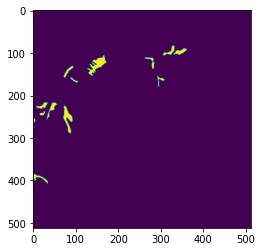

In [21]:
plt.imshow(Y_train[0])

In [8]:

inputs = keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = keras.layers.Lambda(lambda x: x / 255)(inputs)
c1 = keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = keras.layers.Dropout(0.1)(c1)
c1 = keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = keras.layers.MaxPooling2D((2, 2))(c1)

c2 = keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = keras.layers.Dropout(0.1)(c2)
c2 = keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = keras.layers.MaxPooling2D((2, 2))(c2)

c3 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = keras.layers.Dropout(0.1)(c3)
c3 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = keras.layers.MaxPooling2D((2, 2))(c3)

c4 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = keras.layers.Dropout(0.1)(c4)
c4 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = keras.layers.MaxPooling2D((2, 2))(c4)

c5 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = keras.layers.Dropout(0.1)(c5)
c5 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
# Expansive path
u6 = keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = keras.layers.concatenate([u6, c4])
c6 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = keras.layers.Dropout(0.2)(c6)
c6 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = keras.layers.concatenate([u7, c3])
c7 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = keras.layers.Dropout(0.2)(c7)
c7 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = keras.layers.concatenate([u8, c2])
c8 = keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = keras.layers.Dropout(0.1)(c8)
c8 = keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = keras.layers.concatenate([u9, c1], axis=3)
c9 = keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = keras.layers.Dropout(0.1)(c9)
c9 = keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
outputs = keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512, 512, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 512, 512, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 512, 512, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [9]:
checkpointer = keras.callbacks.ModelCheckpoint('model_for_plants.h5', verbose=1, save_best_only=True);
callbacks = [
    keras.callbacks.EarlyStopping(patience=1, monitor='val_loss'),
    keras.callbacks.TensorBoard(log_dir='logs')]

result = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=10, callbacks=callbacks)

idx = random.randint(0, len(X_train))


Epoch 1/25
25/25 [==============================] - 370s 14s/step - loss: 0.2734 - accuracy: 0.8669 - val_loss: 0.0305 - val_accuracy: 0.9966
Epoch 2/25
25/25 [==============================] - 345s 14s/step - loss: 0.0176 - accuracy: 0.9981 - val_loss: 0.0286 - val_accuracy: 0.9966
Epoch 3/25
25/25 [==============================] - 346s 14s/step - loss: 0.0158 - accuracy: 0.9980 - val_loss: 0.0254 - val_accuracy: 0.9966
Epoch 4/25
25/25 [==============================] - 345s 14s/step - loss: 0.0149 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9966
Epoch 5/25
25/25 [==============================] - 349s 14s/step - loss: 0.0161 - accuracy: 0.9979 - val_loss: 0.0323 - val_accuracy: 0.9966


In [17]:
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


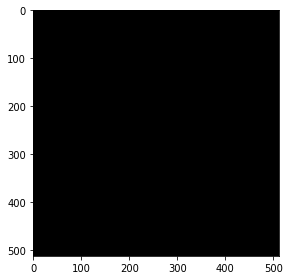

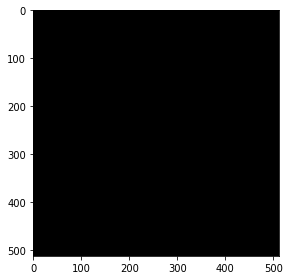

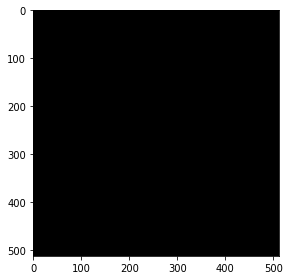

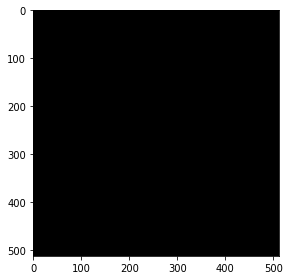

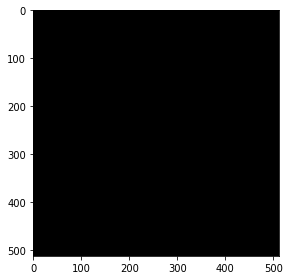

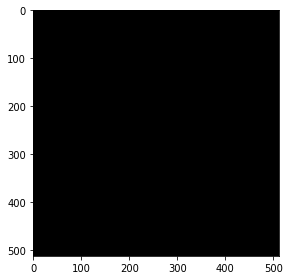

In [18]:
imshow(np.squeeze(preds_test_t[5]*0.9))
plt.show()
imshow(np.squeeze(preds_test_t[6]*0.9))
plt.show()
imshow(np.squeeze(preds_test_t[7]*0.9))
plt.show()
imshow(np.squeeze(preds_test_t[8]*0.9))
plt.show()
imshow(np.squeeze(preds_test_t[9]*0.9))
plt.show()
imshow(np.squeeze(preds_test_t[10]*0.9))
plt.show()